# Structure

Below, we choosing the two-qubits cat problem using simple circuit $CNOT_{B \rightarrow A}^{(cos^2(\phi))} CNOT_{A \rightarrow B}^{(cos^2(\theta))}$ to find possible effect of symmetry guidance term.

Following, we would calculate the circuit form $U(\theta)$ started from the decomposition of CNOT gate.

Then, the O_tilde form -> P(O) form -> SG function plot

# CNOT eigen-decoposition

In [1]:
%matplotlib inline
import numpy as np

# 定义CNOT门矩阵
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

# 计算CNOT门的本征值和本征向量
eigenvalues, eigenvectors = np.linalg.eig(CNOT)

# 输出本征值和本征向量
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# 计算P和D矩阵
P = eigenvectors
D = np.diag(eigenvalues)
P_inv = np.linalg.inv(P)


# 输出P和D矩阵
print("P matrix:\n", P)
print("D matrix:\n", D)
print("P_inv matrix:\n", P_inv)

#* CNOT_{B->A}

CNOT2 = np.array([[1, 0, 0, 0],
                  [0, 0, 0, 1],
                  [0, 0, 1, 0],
                  [0, 1, 0, 0]])

# 计算CNOT门的本征值和本征向量
eigenvalues2, eigenvectors2 = np.linalg.eig(CNOT2)

# 输出本征值和本征向量
print("Eigenvalues2:\n", eigenvalues2)
print("Eigenvectors2:\n", eigenvectors2)

# 计算P和D矩阵
P2 = eigenvectors2
D2 = np.diag(eigenvalues2)
P2_inv = np.linalg.inv(P2)

# 输出P和D矩阵
print("P2 matrix:\n", P2)
print("D2 matrix:\n", D2)
print("P2_inv matrix:\n", P2_inv)
  

Eigenvalues:
 [ 1. -1.  1.  1.]
Eigenvectors:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
P matrix:
 [[ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]]
D matrix:
 [[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
P_inv matrix:
 [[ 0.          0.          0.70710678  0.70710678]
 [ 0.          0.         -0.70710678  0.70710678]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]]
Eigenvalues2:
 [ 1. -1.  1.  1.]
Eigenvectors2:
 [[ 0.          0.          1.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710

# Circuit Form U(θ)

In [2]:
import sympy as sp
from sympy import sqrt, symbols, pi, cos, Matrix, latex, trace
from IPython.display import display, Math

# 定义符号变量
theta = sp.Symbol('theta', real=True)
phi = sp.Symbol('phi', real=True)

# 定义矩阵D
D = sp.diag(1, sp.exp(sp.I*sp.pi*sp.cos(theta)**2), 1, 1)
D2 = sp.diag(1, sp.exp(sp.I*sp.pi*sp.cos(phi)**2), 1, 1)

U = (P * D * P_inv) * (P2 * D2 * P2_inv)

print("U(θ):")
display(Math(latex(U)))

U(θ):


<IPython.core.display.Math object>

As the Z msmt result of input 00 and 11 are related to the front two columns of the matrix, we could easily found outputs of them are 1 and -1, respectively. Both of them are independent of θ.

# O_tilde

In [3]:
from sympy import tensorproduct

II = np.eye(2)
Z = np.array([[1, 0], [0, -1]])
Ob = np.kron(II, Z)

print("Observable matrix:")
print(Ob)

# 计算U(a)^\dagger O U(a)
U_dagger = U.H
O_tilde = U_dagger @ Ob @ U
O_tilde.simplify()

print("U:")
display(Math(latex(U)))
print("U(a)^\dagger:")
display(Math(latex(U_dagger)))
# print("U(a)^\dagger @ Ob:")
# display(Math(latex(U_dagger@Ob)))
print("O_tilde:")
display(Math(latex(O_tilde)))

Observable matrix:
[[ 1.  0.  0.  0.]
 [ 0. -1.  0. -0.]
 [ 0.  0.  1.  0.]
 [ 0. -0.  0. -1.]]
U:


<IPython.core.display.Math object>

U(a)^\dagger:


<IPython.core.display.Math object>

O_tilde:


<IPython.core.display.Math object>

# PO and SG

In [14]:
SWAP = Matrix([[1, 0, 0, 0],
               [0, 0, 1, 0],
               [0, 1, 0, 0],
               [0, 0, 0, 1]])

S_dagger = SWAP.T  # SWAP 门是自它的转置的逆，因此 S^† = S^T
PO1 = S_dagger @ O_tilde @ SWAP
PO1.simplify()
print("PO1 matrix:")
display(Math(latex(PO1)))

II = Matrix([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
PO2 = II @ O_tilde @ II
PO2.simplify()
print("PO2 matrix:")
display(Math(latex(PO2)))

PO = 1/2 * (PO1 + PO2)

print("PO matrix:")
display(Math(latex(PO)))

# 计算 PO 和 O_tilde 之间的差
diff_matrix = PO - O_tilde

# 计算 H-S norm
# HS_norm = sqrt(sum([abs(elem)**2 for elem in diff_matrix]))
# HS_norm = sqrt(trace(diff_matrix.H * diff_matrix))
# HS_norm = abs(trace(diff_matrix.H * diff_matrix))
HS_norm = trace(diff_matrix.H * diff_matrix)

# 简化表达式
HS_norm = HS_norm.simplify()

print("HS_norm:")
display(Math(latex(HS_norm)))

PO1 matrix:


<IPython.core.display.Math object>

PO2 matrix:


<IPython.core.display.Math object>

PO matrix:


<IPython.core.display.Math object>

HS_norm:


<IPython.core.display.Math object>

we could see that, for all kinds of possible circuit parameter settings, twirling operation would make the prediction better or worse or keeps.

Then its hard to tell what would twirling do to the circuit.

# SG Plot

output on 00 and 11 would always be constant values as stated below, here we plot the SG relative to $\theta$

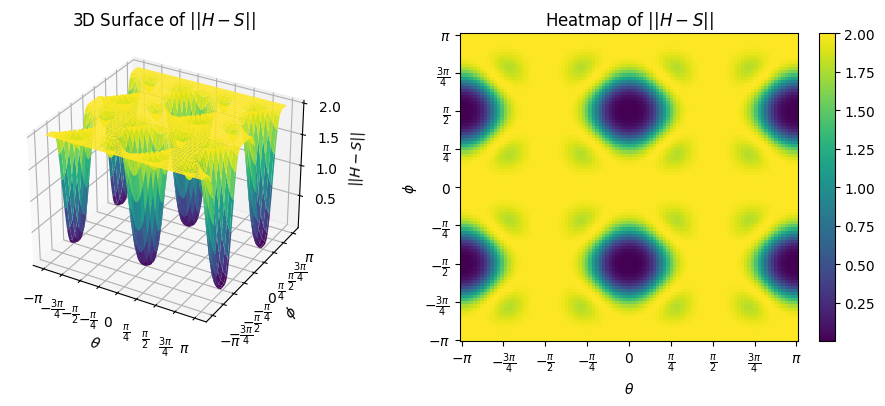

In [17]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

ticks = np.linspace(-np.pi, np.pi, 9) 
tick_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', 0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

theta_samples = np.linspace(-np.pi, np.pi, 100)
phi_samples = np.linspace(-np.pi, np.pi, 100)

y_sg_func = sp.lambdify([theta, phi], HS_norm, 'numpy')
theta_samples, phi_samples = np.meshgrid(theta_samples, phi_samples)

y_sg_values = y_sg_func(theta_samples, phi_samples)

fig = plt.figure(figsize=(12, 4))

# 3D 曲面子图
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(theta_samples, phi_samples, y_sg_values, cmap='viridis')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\phi$')
ax1.set_xticks(ticks)
ax1.set_xticklabels(tick_labels)
ax1.set_yticks(ticks)
ax1.set_yticklabels(tick_labels)
ax1.set_zlabel(r'$\|\|H-S\|\|$')
ax1.set_title(r'3D Surface of $\|\|H-S\|\|$')

# Heatmap 子图
ax2 = fig.add_subplot(122)
c = ax2.pcolormesh(theta_samples, phi_samples, abs(y_sg_values), cmap='viridis', shading='auto')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\phi$')
ax2.set_xticks(ticks)
ax2.set_xticklabels(tick_labels)
ax2.set_yticks(ticks)
ax2.set_yticklabels(tick_labels)
ax2.set_title(r'Heatmap of $\|\|H-S\|\|$')

# 添加 colorbar
fig.colorbar(c, ax=ax2)

plt.show()

# Output forms of each input

In [6]:
def zMsmtU_columnalue(U_column):
    odd_sum = sum([np.abs(U_column[i])**2 for i in range(1, len(U_column), 2)])
    even_sum = sum([np.abs(U_column[i])**2 for i in range(0, len(U_column), 2)])
    rs = sp.simplify(even_sum - odd_sum)
    return sp.nsimplify(rs, tolerance=1e-10)

display(Math(latex(U)))

zVals = [0, 0, 0, 0]

for i in range(4):
    U_column = U[:,i]
    display(Math(latex(U_column.T)))
    zVals[i] = zMsmtU_columnalue(U_column)
    display(Math(latex(zVals[i])))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Summary
This is the same as the circuit $CNOT_{A \rightarrow B}^{(cos^2(\theta))}$, both the circuit output and SG

# loss function and label strategy

1. cc loss for each input
2. plot each 3-d view loss landscape

## square loss

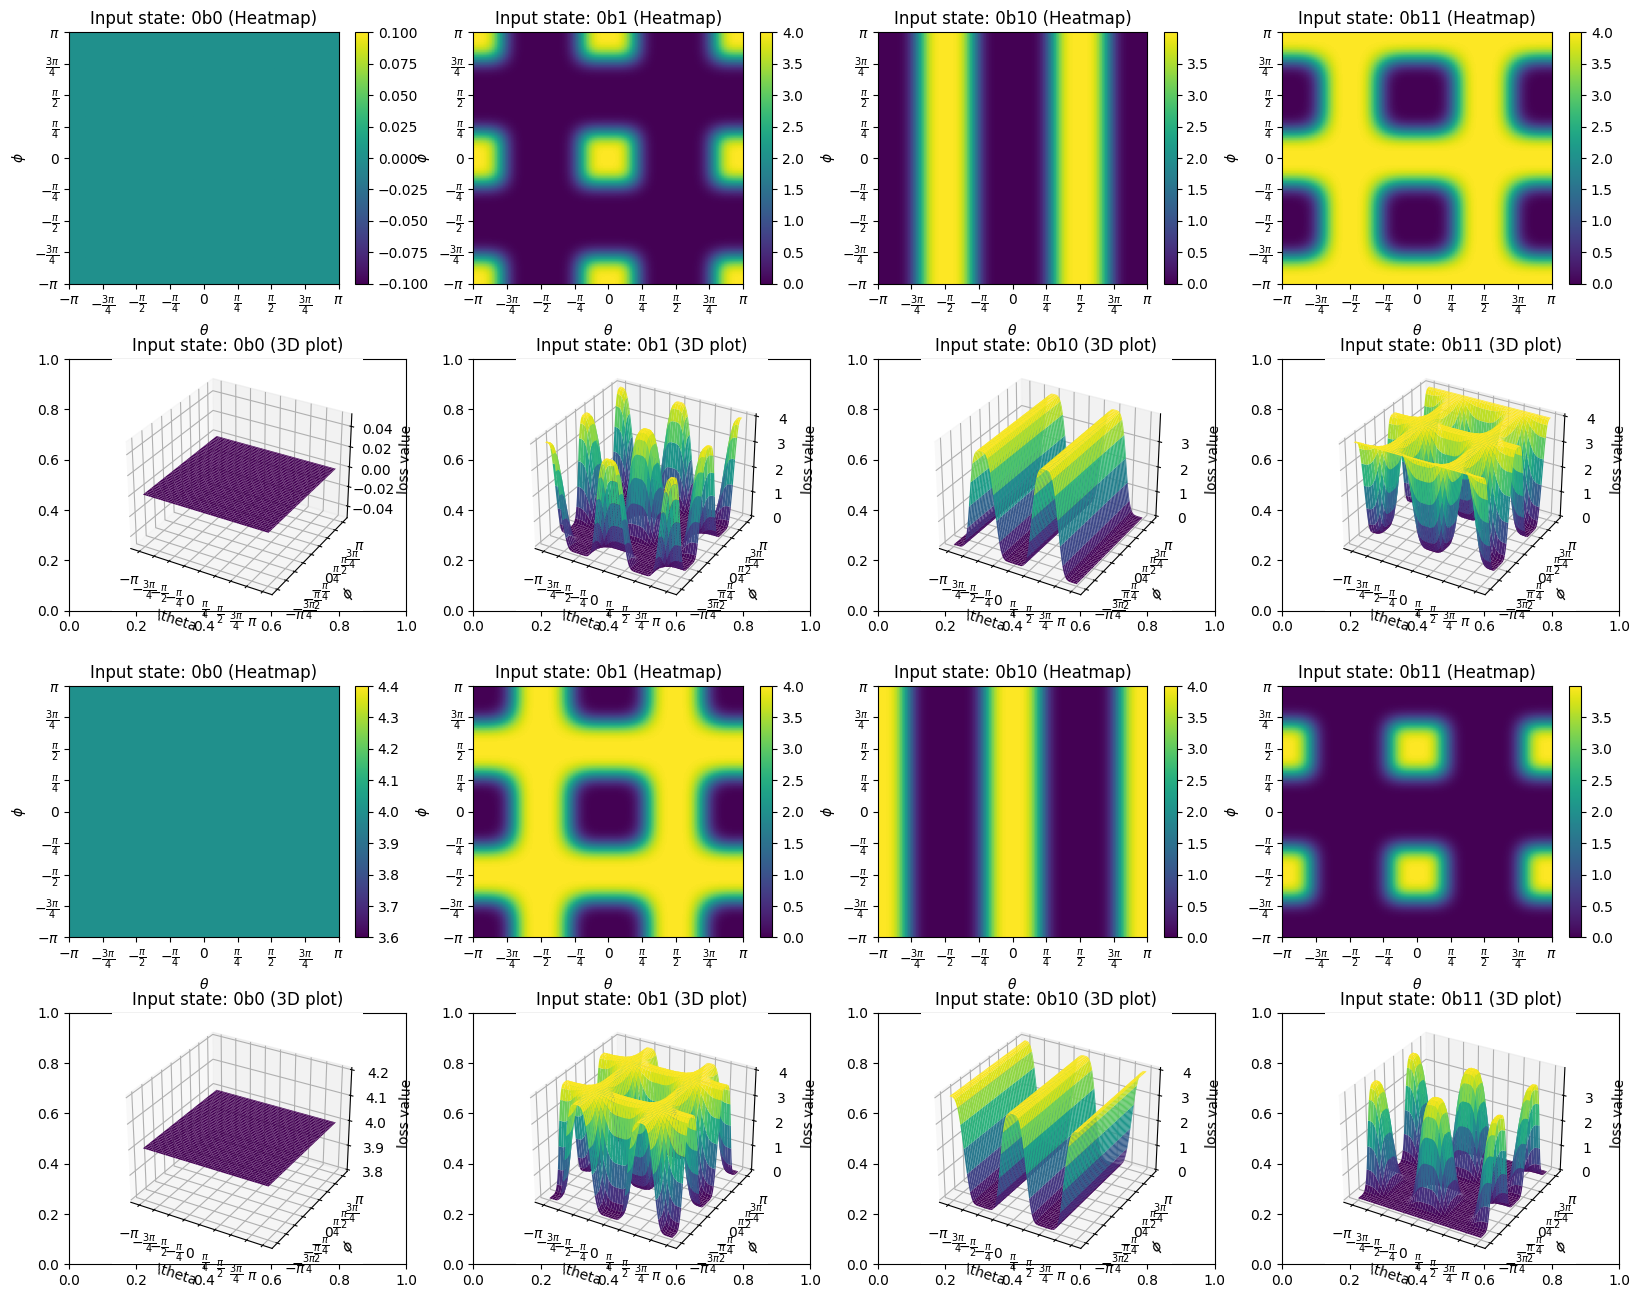

In [7]:
zLabels = [[1, -1, -1, 1], [-1, 1, 1, -1]] # y < 0 -> -1 as cat; y > 0 -> 1 as cat

theta_samples = np.linspace(-np.pi, np.pi, 100)
phi_samples = np.linspace(-np.pi, np.pi, 100)
theta_samples, phi_samples = np.meshgrid(theta_samples, phi_samples)

fig, axs = plt.subplots(4, 4, figsize=(20, 16))

ticks = np.linspace(-np.pi, np.pi, 9) 
tick_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', 0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

for zIdx, zLabel in enumerate(zLabels):
    for i in range(4):
        y_square_loss = (zVals[i] - zLabel[i])**2
        y_square_loss_func = sp.lambdify([theta, phi], y_square_loss, 'numpy')
        y_square_loss_func_vectorized = np.vectorize(y_square_loss_func)
        y_square_loss_values = np.abs(y_square_loss_func_vectorized(theta_samples, phi_samples))

        axs[2*zIdx, i].set_title(f"Input state: {bin(i)} (Heatmap)")
        heatmap = axs[2*zIdx, i].imshow(y_square_loss_values, cmap='viridis', origin='lower',
                                extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto')
        axs[2*zIdx, i].set_xlabel(r'$\theta$')
        axs[2*zIdx, i].set_ylabel(r'$\phi$')
        axs[2*zIdx, i].set_xticks(ticks)
        axs[2*zIdx, i].set_xticklabels(tick_labels)
        axs[2*zIdx, i].set_yticks(ticks)
        axs[2*zIdx, i].set_yticklabels(tick_labels)
        fig.colorbar(heatmap, ax=axs[2*zIdx, i])

        axs[2*zIdx+1, i] = fig.add_subplot(4, 4, 8*zIdx+i+5, projection='3d')
        axs[2*zIdx+1, i].set_title(f"Input state: {bin(i)} (3D plot)")
        surf = axs[2*zIdx+1, i].plot_surface(theta_samples, phi_samples, y_square_loss_values, cmap='viridis', edgecolor='none')
        axs[2*zIdx+1, i].set_xlabel(r'\theta')
        axs[2*zIdx+1, i].set_ylabel(r'$\phi$')
        axs[2*zIdx+1, i].set_xticks(ticks)
        axs[2*zIdx+1, i].set_xticklabels(tick_labels)
        axs[2*zIdx+1, i].set_yticks(ticks)
        axs[2*zIdx+1, i].set_yticklabels(tick_labels)
        axs[2*zIdx+1, i].set_zlabel('loss value')
    
plt.subplots_adjust(hspace=0.3)
plt.show()

then, add SG

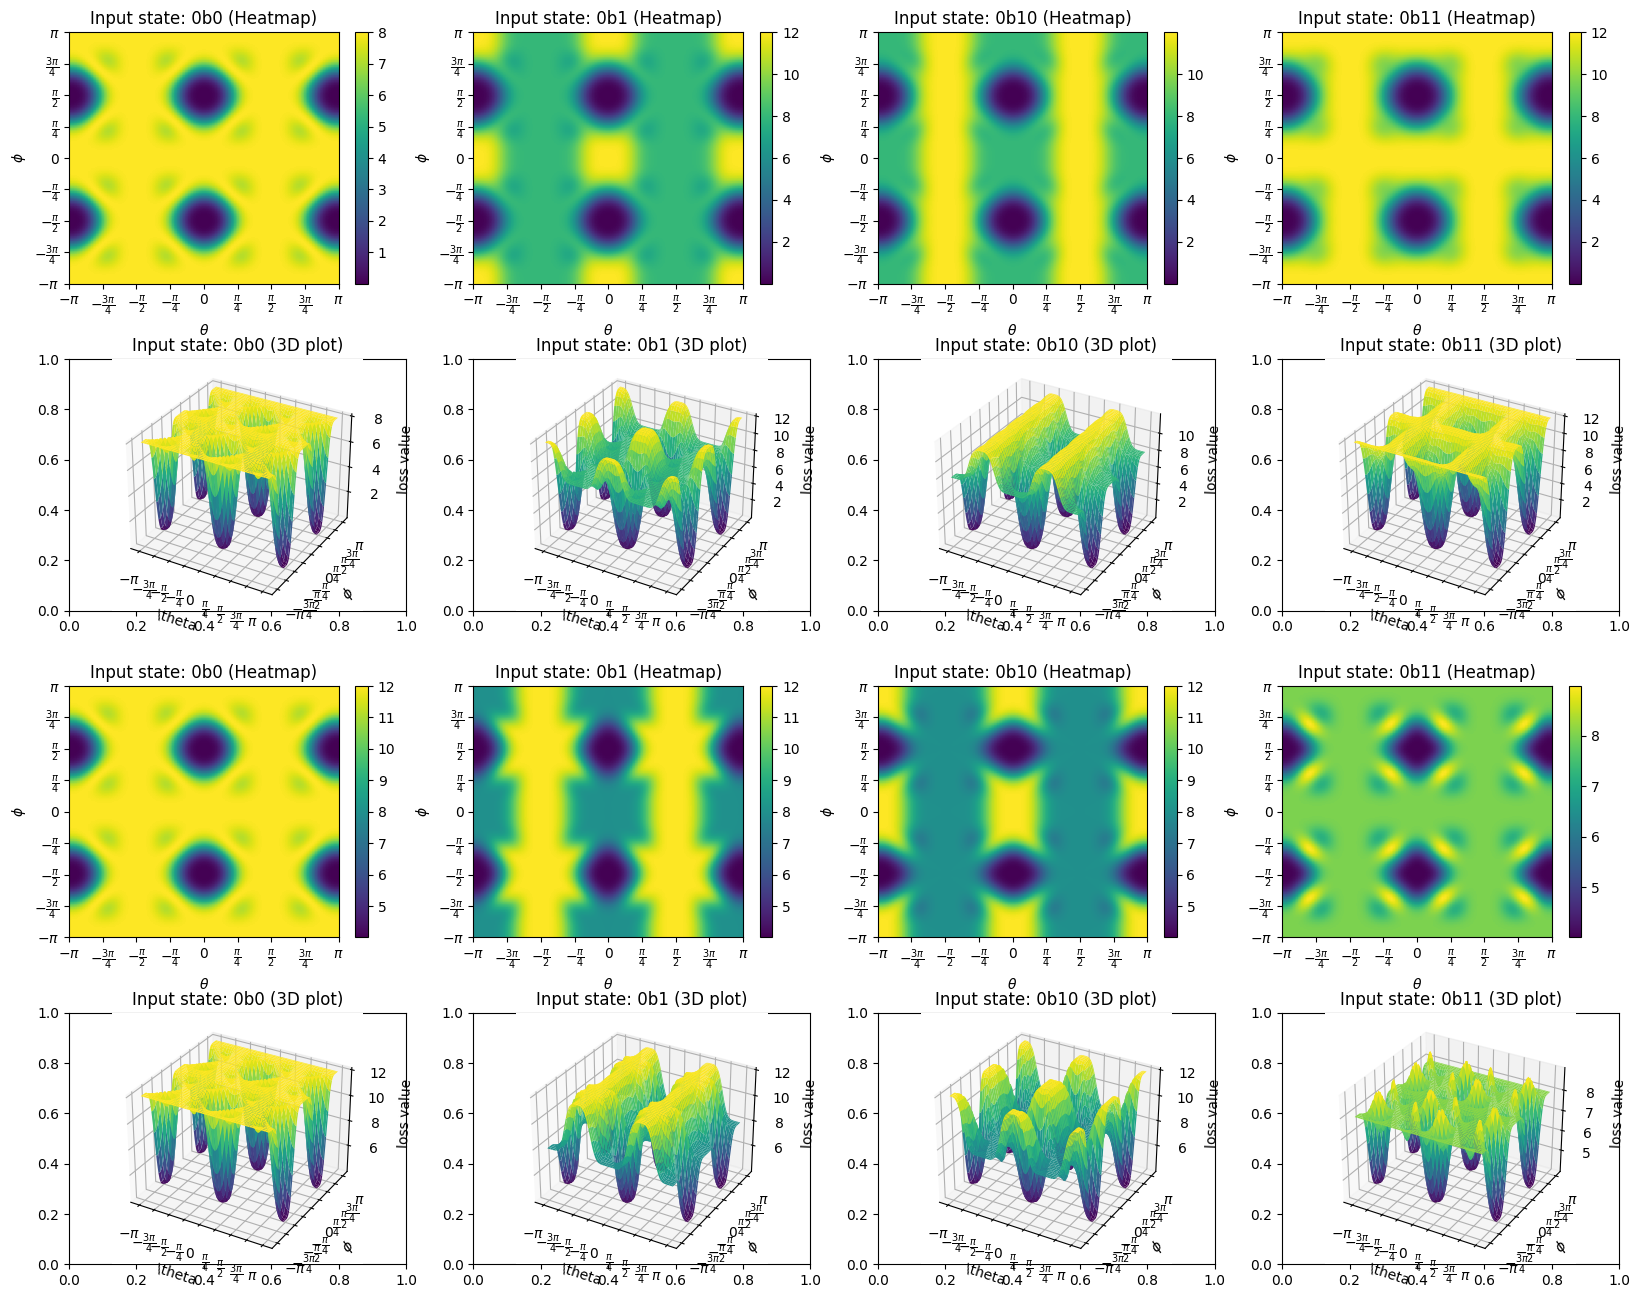

In [20]:
zLabels = [[1, -1, -1, 1], [-1, 1, 1, -1]] # y < 0 -> -1 as cat; y > 0 -> 1 as cat

theta_samples = np.linspace(-np.pi, np.pi, 100)
phi_samples = np.linspace(-np.pi, np.pi, 100)
theta_samples, phi_samples = np.meshgrid(theta_samples, phi_samples)

fig, axs = plt.subplots(4, 4, figsize=(20, 16))

ticks = np.linspace(-np.pi, np.pi, 9) 
tick_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', 0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

for zIdx, zLabel in enumerate(zLabels):
    for i in range(4):
        y_square_loss = (zVals[i] - zLabel[i])**2
        y_square_loss_func = sp.lambdify([theta, phi], y_square_loss, 'numpy')
        y_square_loss_func_vectorized = np.vectorize(y_square_loss_func)
        y_square_loss_values = np.abs(y_square_loss_func_vectorized(theta_samples, phi_samples))
        sg_values = y_sg_func(theta_samples, phi_samples)
        y_square_loss_values_sg = y_square_loss_values + 4*abs(sg_values)

        axs[2*zIdx, i].set_title(f"Input state: {bin(i)} (Heatmap)")
        heatmap = axs[2*zIdx, i].imshow(y_square_loss_values_sg, cmap='viridis', origin='lower',
                                extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto')
        axs[2*zIdx, i].set_xlabel(r'$\theta$')
        axs[2*zIdx, i].set_ylabel(r'$\phi$')
        axs[2*zIdx, i].set_xticks(ticks)
        axs[2*zIdx, i].set_xticklabels(tick_labels)
        axs[2*zIdx, i].set_yticks(ticks)
        axs[2*zIdx, i].set_yticklabels(tick_labels)
        fig.colorbar(heatmap, ax=axs[2*zIdx, i])

        axs[2*zIdx+1, i] = fig.add_subplot(4, 4, 8*zIdx+i+5, projection='3d')
        axs[2*zIdx+1, i].set_title(f"Input state: {bin(i)} (3D plot)")
        surf = axs[2*zIdx+1, i].plot_surface(theta_samples, phi_samples, y_square_loss_values_sg, cmap='viridis', edgecolor='none')
        axs[2*zIdx+1, i].set_xlabel(r'\theta')
        axs[2*zIdx+1, i].set_ylabel(r'$\phi$')
        axs[2*zIdx+1, i].set_xticks(ticks)
        axs[2*zIdx+1, i].set_xticklabels(tick_labels)
        axs[2*zIdx+1, i].set_yticks(ticks)
        axs[2*zIdx+1, i].set_yticklabels(tick_labels)
        axs[2*zIdx+1, i].set_zlabel('loss value')
    
plt.subplots_adjust(hspace=0.3)
plt.show()

## hinge loss

In [ ]:
zLabels = [[1, -1, -1, 1], [-1, 1, 1, -1]] # y < 0 -> -1 as cat; y > 0 -> 1 as cat

theta_samples = np.linspace(-np.pi, np.pi, 100)
phi_samples = np.linspace(-np.pi, np.pi, 100)
theta_samples, phi_samples = np.meshgrid(theta_samples, phi_samples)

fig, axs = plt.subplots(4, 4, figsize=(20, 16))

ticks = np.linspace(-np.pi, np.pi, 9) 
tick_labels = [r'$-\pi$', r'$-\frac{3\pi}{4}$', r'$-\frac{\pi}{2}$', r'$-\frac{\pi}{4}$', 0, r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']

for zIdx, zLabel in enumerate(zLabels):
    for i in range(4):
        y_hinge_loss = sp.Max(0, 1 - zVals[i] * zLabel[i])
        y_hinge_loss_func = sp.lambdify([theta, phi], y_hinge_loss, 'numpy')
        y_hinge_loss_func_vectorized = np.vectorize(y_hinge_loss_func)
        y_hinge_loss_values = np.abs(y_hinge_loss_func_vectorized(theta_samples, phi_samples))

        axs[2*zIdx, i].set_title(f"Input state: {bin(i)} (Heatmap)")
        heatmap = axs[2*zIdx, i].imshow(y_hinge_loss_values, cmap='viridis', origin='lower',
                                extent=[-np.pi, np.pi, -np.pi, np.pi], aspect='auto')
        axs[2*zIdx, i].set_xlabel(r'\theta')
        axs[2*zIdx, i].set_ylabel(r'$\phi$')
        axs[2*zIdx, i].set_xticks(ticks)
        axs[2*zIdx, i].set_xticklabels(tick_labels)
        axs[2*zIdx, i].set_yticks(ticks)
        axs[2*zIdx, i].set_yticklabels(tick_labels)
        fig.colorbar(heatmap, ax=axs[2*zIdx, i])

        axs[2*zIdx+1, i] = fig.add_subplot(4, 4, 8*zIdx+i+5, projection='3d')
        axs[2*zIdx+1, i].set_title(f"Input state: {bin(i)} (3D plot)")
        surf = axs[2*zIdx+1, i].plot_surface(theta_samples, phi_samples, y_hinge_loss_values, cmap='viridis', edgecolor='none')
        axs[2*zIdx+1, i].set_xlabel(r'\theta')
        axs[2*zIdx+1, i].set_ylabel(r'$\phi$')
        axs[2*zIdx+1, i].set_xticks(ticks)
        axs[2*zIdx+1, i].set_xticklabels(tick_labels)
        axs[2*zIdx+1, i].set_yticks(ticks)
        axs[2*zIdx+1, i].set_yticklabels(tick_labels)
        axs[2*zIdx+1, i].set_zlabel('loss value')
    
plt.subplots_adjust(hspace=0.3)
plt.show()